 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [88]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_filepath = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_filepath = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)

algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_filepath = Path("Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].replace({'\$':'',',':''}, regex=True).astype(float)



In [49]:
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [14]:
sp500_df.dtypes

Close    float64
dtype: object

In [50]:
# Calculate Daily Returns
sp500_dailyreturns_df = sp500_df.pct_change()
sp500_dailyreturns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [51]:
# Drop nulls
sp500_dailyreturns_df.dropna(inplace=True)

In [52]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dailyreturns_df.rename(columns={"Close": "S&P 500"}, inplace = True)
sp500_dailyreturns_df.head()


,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [53]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df, algo_df, sp500_dailyreturns_df], axis="columns", join="inner")
combined_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Portfolio Returns'}, xlabel='Date'>

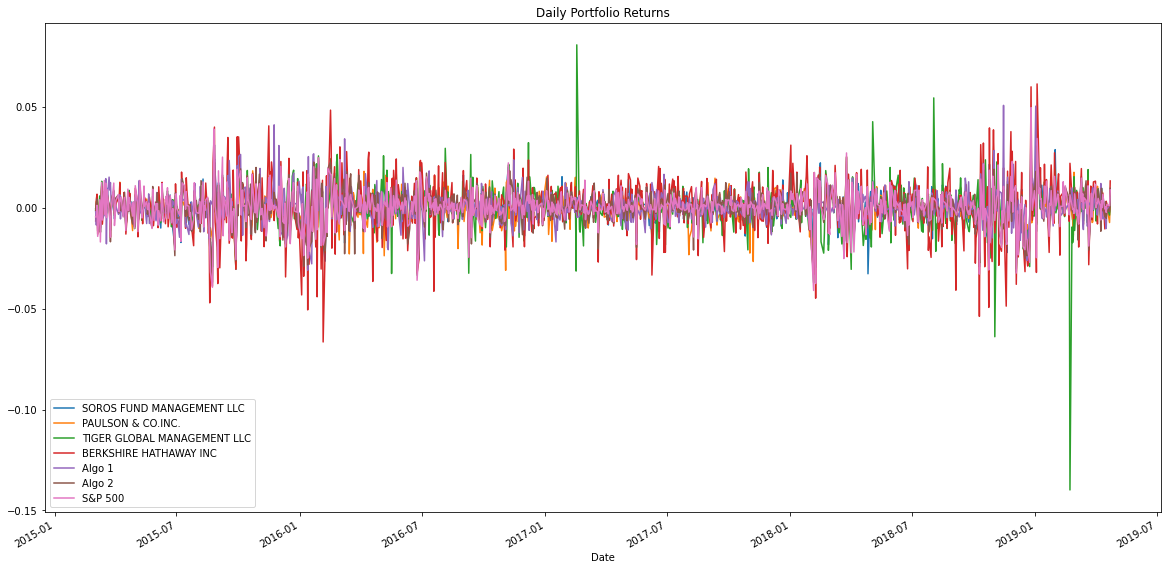

In [54]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10), title="Daily Portfolio Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='Date'>

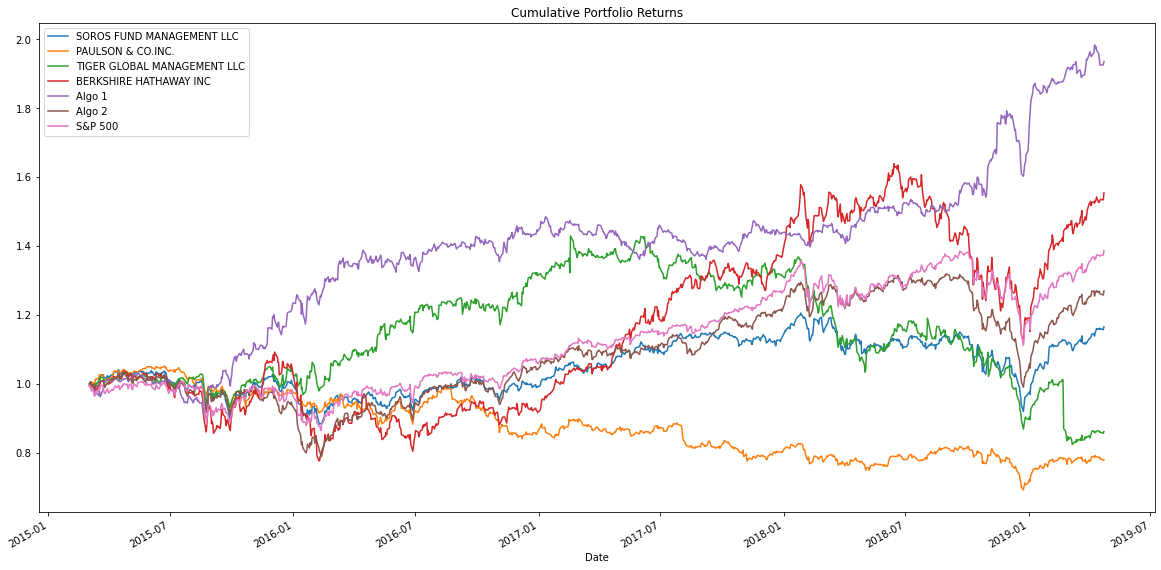

In [55]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Cumulative Portfolio Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Portfolio Return Distribution'}>

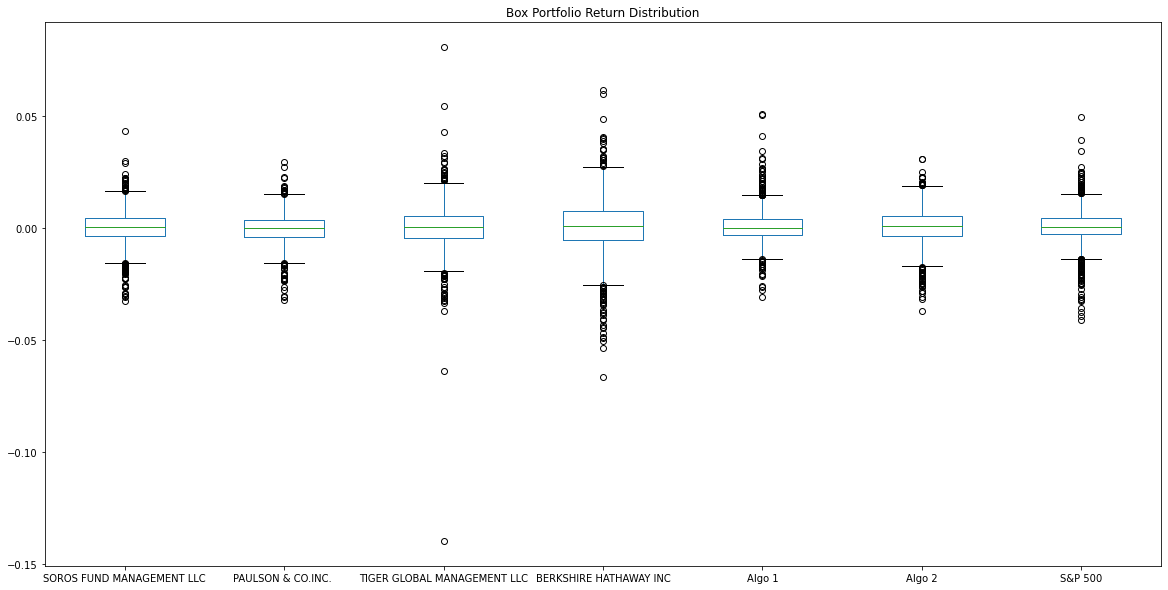

In [56]:
# Box plot to visually show risk
combined_returns_df.plot(kind='box', figsize=(20,10), title="Box Portfolio Return Distribution")

### Calculate Standard Deviations

In [57]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns_df.std()
combined_std.sort_values(ascending=False, inplace=True)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [58]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_dailyreturns_df.std()
sp500_std

S&P 500    0.008111
dtype: float64

# Determine which portfolios are riskier than the S&P 500
## Based on the calculated standard deviations Tiger Global and Berkshire Hathaway 

### Calculate the Annualized Standard Deviation

In [60]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_returns_df.std()*np.sqrt(252)
annual_std.sort_values(ascending=False, inplace=True)
annual_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

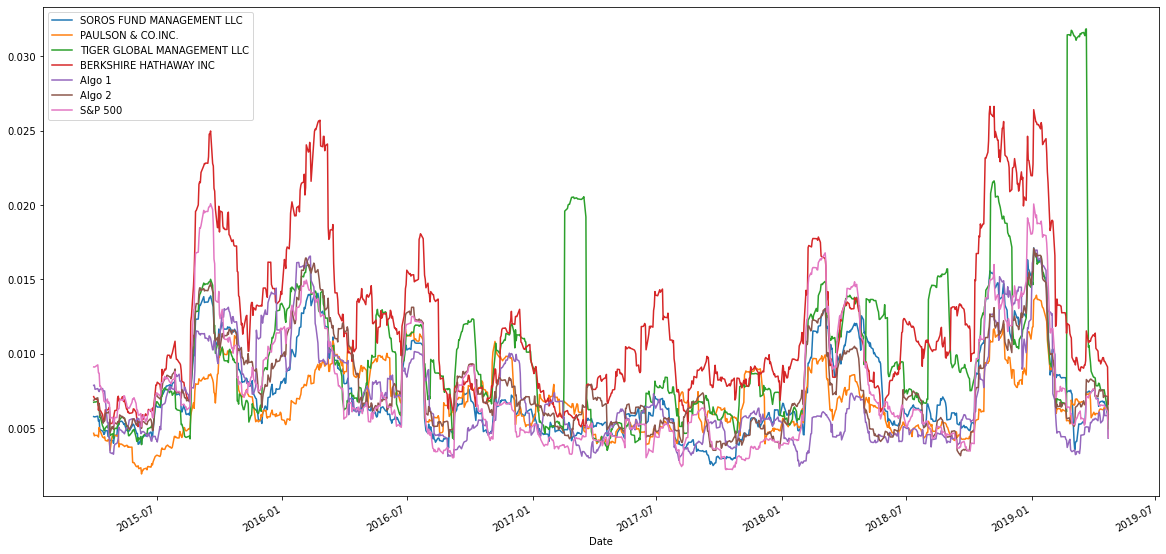

In [61]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling21_std = combined_returns_df.rolling(window=21).std().dropna()

# Plot the rolling standard deviation
combined_rolling21_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [62]:
# Calculate the correlation
correlation = combined_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

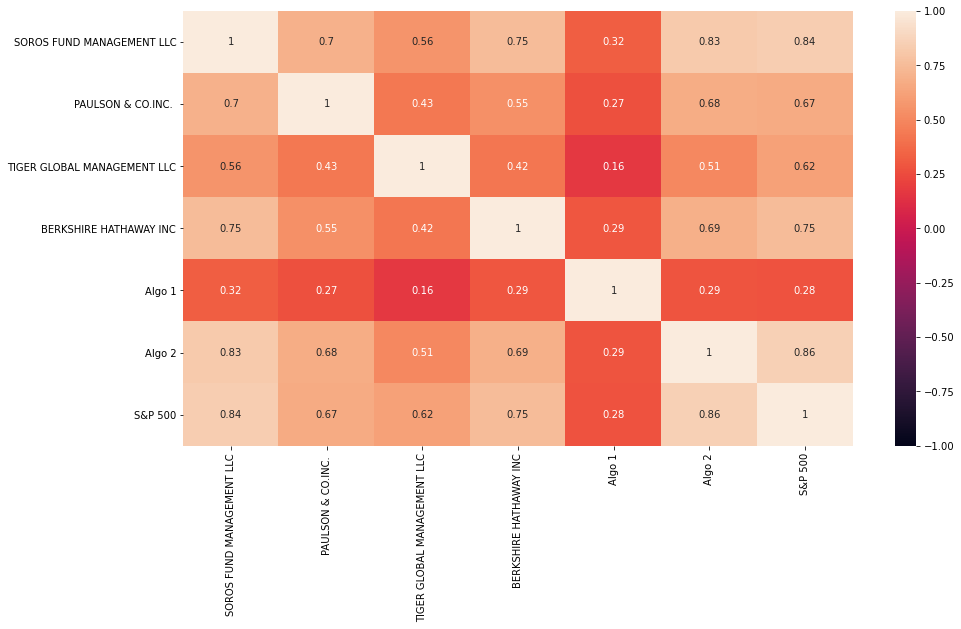

In [92]:
# Display de correlation matrix
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT PORTFOLIO BETA'}, xlabel='Date'>

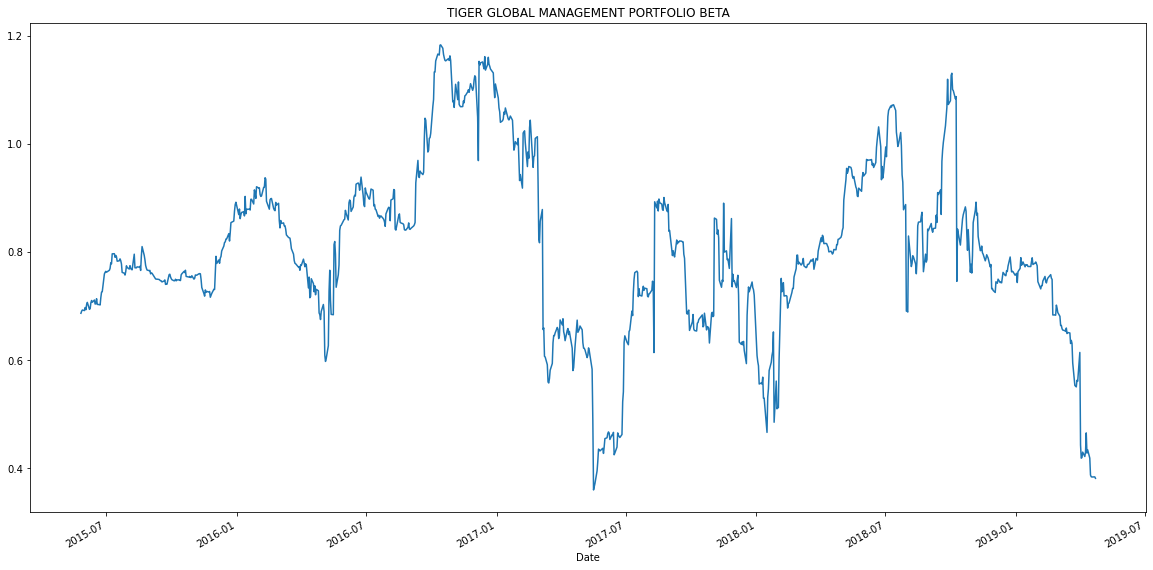

In [63]:
# Calculate covariance of a single portfolio
covariance_tiger = combined_returns_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns_df['S&P 500'])


# Calculate variance of S&P 500
variance_SP500 = combined_returns_df['S&P 500'].var()

# Computing beta
tiger_beta = covariance_tiger / variance_SP500
tiger_beta

#Plot beta trend
covariance_tiger_rolling60 = combined_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_returns_df['S&P 500'])
variance_SP500_rolling60 = combined_returns_df['S&P 500'].rolling(window=60).var()

tiger_beta_rolling60 = covariance_tiger_rolling60 / variance_SP500_rolling60
tiger_beta_rolling60.plot(figsize=(20,10), title='TIGER GLOBAL MANAGEMENT PORTFOLIO BETA')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

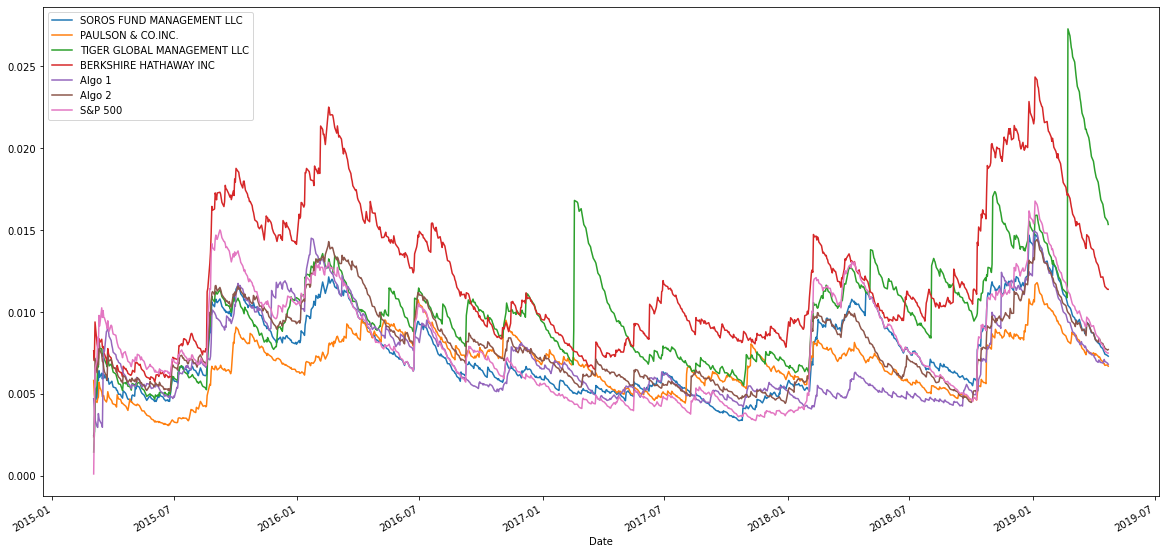

In [64]:
# Use `ewm` to calculate the rolling window
combined_ewm21_std = combined_returns_df.ewm(halflife=21).std().dropna()
combined_ewm21_std.plot(figsize=(20,10))



---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Annualized Sharpe Ratios
'''Note the risk free rate was excluded from the equation as interest rates are currently neglible at zero.'''

sharpe_ratios = (combined_returns_df.mean()*252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

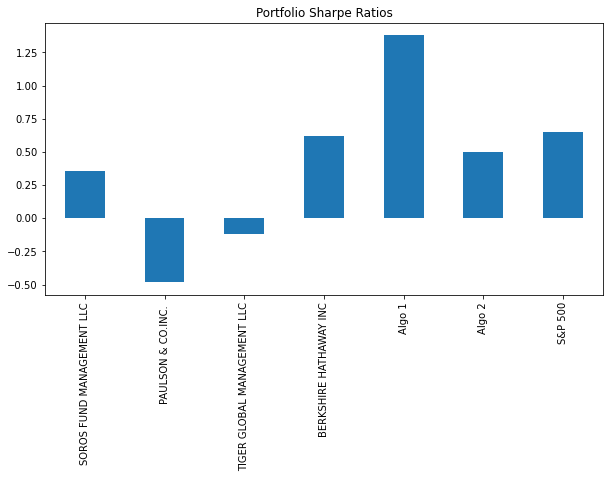

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(10,5), title="Portfolio Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algorithmic 1 strategy outperformed the market with a Sharpe ratio of 1.37 and all other portfolios. 
Algorithmic 2 strategy outperformed the market with a Sharpe ratio of 0.48 and outperformed all other portfolios except Berkshire Hathaway, which had a Sharpe Ratio of 0.60. The market Sharpe Ratio was -0.51. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [67]:
# Reading data from 1st stock
goog_filepath = Path("Resources/goog_historical.csv")

goog_df = pd.read_csv(goog_filepath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [68]:
# Reading data from 2nd stock
aapl_filepath = Path("Resources/aapl_historical.csv")

aapl_df = pd.read_csv(aapl_filepath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [69]:
# Reading data from 3rd stock
cost_filepath = Path("Resources/cost_historical.csv")

cost_df = pd.read_csv(cost_filepath, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [70]:
# Combine all stocks in a single DataFrame
combined_custom = pd.concat([goog_df, aapl_df, cost_df], axis="rows", join="inner")


In [71]:
# Reset Date index
combined_custom = combined_custom.reset_index()


In [72]:
# Reorganize portfolio data by having a column per symbol
combined_custom = combined_custom.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
combined_custom.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [73]:
# Calculate daily returns
combined_returns = combined_custom.pct_change()
# Drop NAs
combined_returns.dropna(inplace=True)
# Display sample data
combined_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [74]:
# Set weights
weights = [1/3, 1/3, 1/3]

custom_returns = combined_returns.dot(weights).rename('Custom')

# Display sample data
custom_returns


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Name: Custom, Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [75]:
# Join your returns DataFrame to the original returns DataFrame
combine_all = pd.concat([combined_returns_df, custom_returns], axis="columns", join="inner")
combine_all

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [76]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_all.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [77]:
# Calculate the annualized `std`
vol_all = combine_all.std()*np.sqrt(252)
vol_all

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

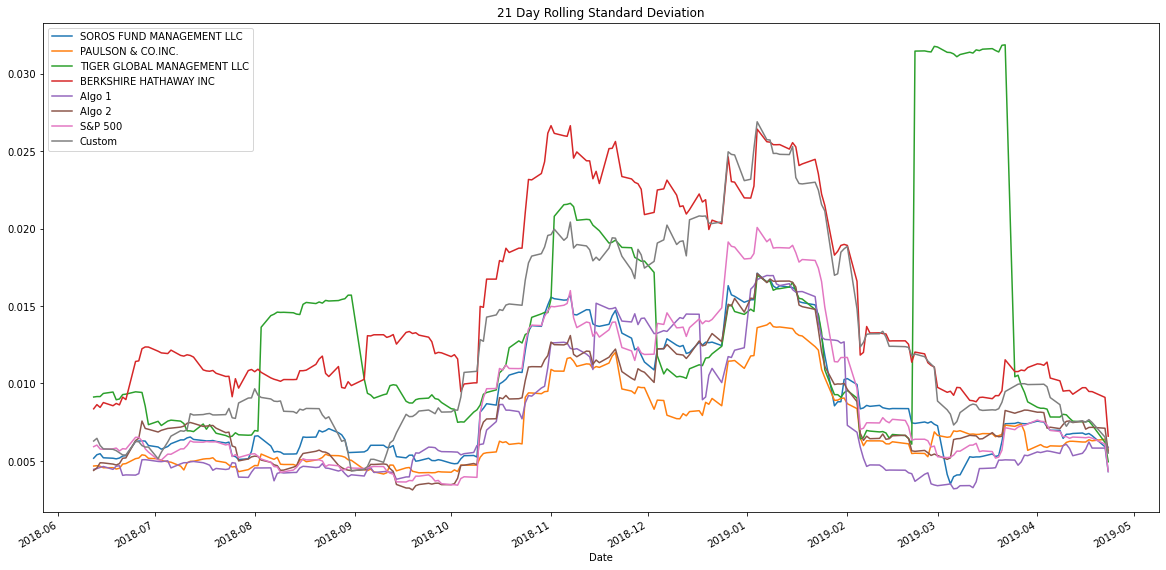

In [78]:
# Calculate rolling standard deviation
combined_all_rolling21_std = combine_all.rolling(window=21).std()

# Plot the rolling standard deviation
combined_all_rolling21_std.plot(figsize=(20,10), title="21 Day Rolling Standard Deviation", xlabel='Date')


### Calculate and plot the correlation

<AxesSubplot:>

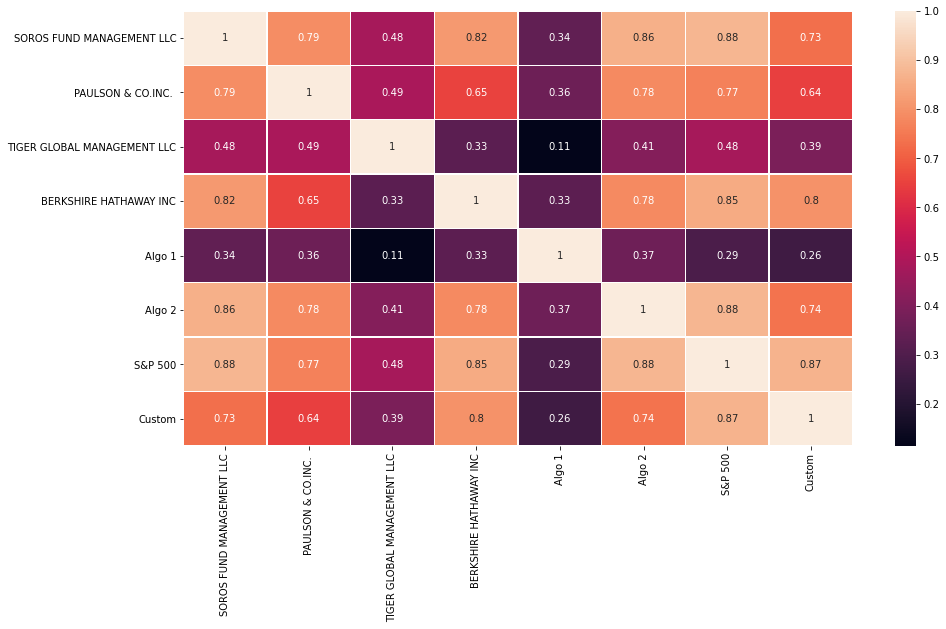

In [91]:
# Calculate the correlation
corr_all = combine_all.corr()
# Display de correlation matrix

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr_all, annot=True, linewidths=.5, ax=ax)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [80]:
# Calculate covariance of a single portfolio
covariance_custom = combine_all['Custom'].cov(combine_all['S&P 500'])


# Calculate variance of S&P 500
variance_SP500 = combine_all['S&P 500'].var()

# Computing beta
custom_beta = covariance_custom / variance_SP500
custom_beta


1.2127120076458702

<AxesSubplot:title={'center':'CUSTOM PORTFOLIO BETA'}, xlabel='Date'>

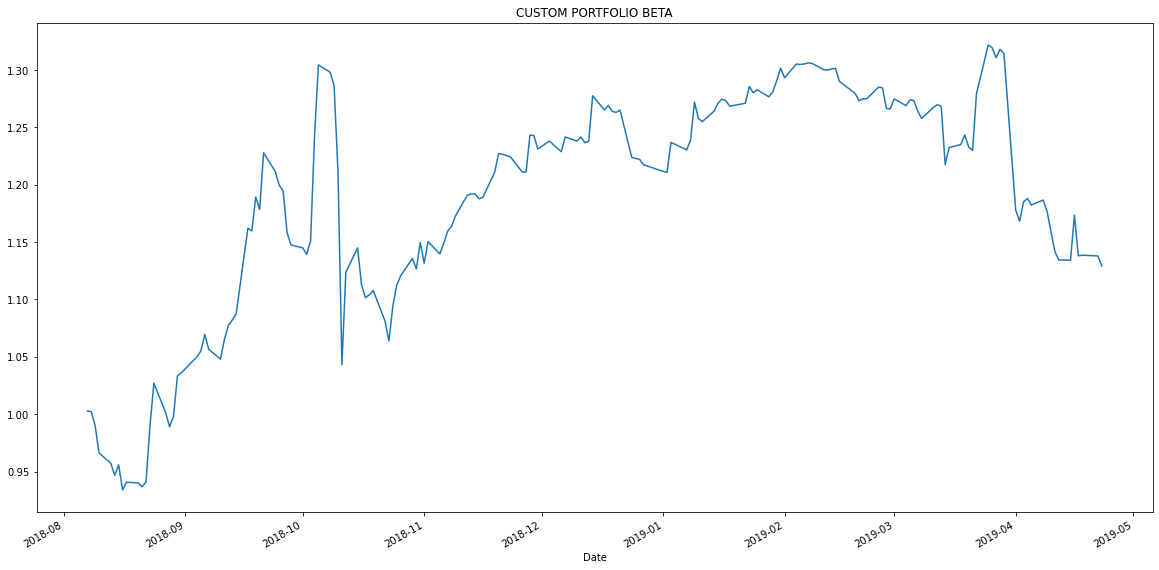

In [94]:
#Plot beta trend
covariance_custom_rolling60 = combine_all['Custom'].rolling(window=60).cov(combine_all['S&P 500'])
variance_SP500_rolling60 = combine_all['S&P 500'].rolling(window=60).var()

custom_beta_rolling60 = covariance_custom_rolling60 / variance_SP500_rolling60
custom_beta_rolling60.plot(figsize=(20,10), title='CUSTOM PORTFOLIO BETA', xlabel="Date")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [82]:
# Calculate Annualzied Sharpe Ratios
'''Note the risk free rate was excluded from the equation as the risk free rate is currently negligible near zero.'''

sharpe_ratios_all = (combine_all.mean()*252) / (combine_all.std() * np.sqrt(252))
sharpe_ratios_all

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

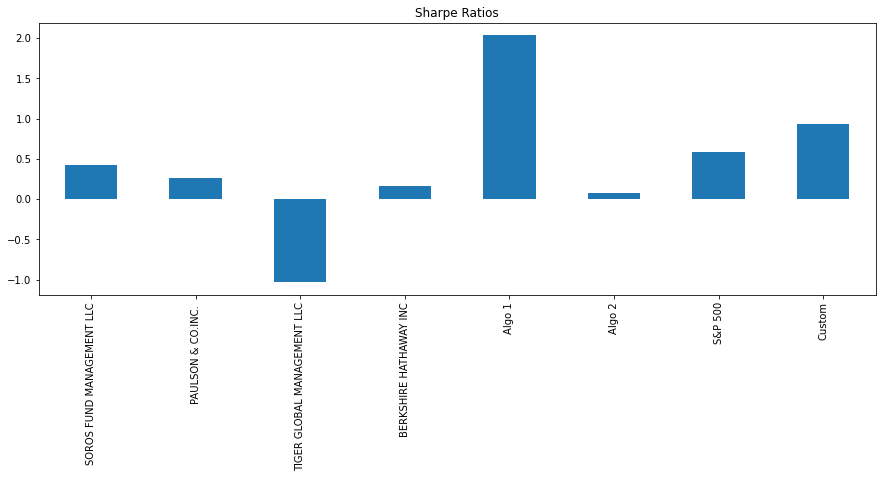

In [97]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", figsize=(15,5), title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!